# 1. Loading Libraries


In [1]:
# %pip install pandas
# %pip install numpy
# %pip install scikit-learn
# %pip install matplotlib
# %pip install plotly
# %pip install ipykernel
# %pip install nbformat
# %pip install --upgrade nbformat
# %pip install holoviews
# %pip install hvplot
# %pip install seaborn
# %pip install mlxtend
# %pip install xgboost
# %pip install scikit-
# %pip install Boruta

In [2]:

from graphs.bar_nominal import bar_plot_nominal
from graphs.bar_unique import bar_plot_unique_var
from graphs.bar_ordinal import bar_plot_ordinal
from graphs.violin import plot_violin
from graphs.bar_index import bar_plot_index
from graphs.violin_percent import plot_violin_percent
from graphs.violin_log import plot_violin_log
from sklearn.model_selection import GridSearchCV
from boruta import BorutaPy
from sklearn.metrics import (
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score,
    log_loss
)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Pré-processamento

### 2.1 Carregando o dataset

In [3]:
#Load the nba.csv file into a DataFrame.
# os.getcwd()

# from google.colab import drive
# drive.mount('/content/drive')

# os.chdir('/content/drive/MyDrive/AI_ML')

# Upload data
df = pd.read_csv('loan_data.csv')
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


##Treat data types

In [4]:
df = df.astype({
    "person_age": np.dtype("int"),
    "person_gender": np.dtype("object"),
    "person_education": np.dtype("object"),
    "person_income": np.dtype("float"),
    "person_emp_exp": np.dtype("int"),
    "person_home_ownership": np.dtype("object"),
    "loan_amnt": np.dtype("float"),
    "loan_intent": np.dtype("object"),
    "loan_int_rate": np.dtype("float"),
    "loan_percent_income": np.dtype("float"),
    "cb_person_cred_hist_length": np.dtype("float"),
    "credit_score": np.dtype("int"),
    "previous_loan_defaults_on_file": np.dtype("object"),
    "loan_status": np.dtype("int")
})
df.dtypes

person_age                          int32
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int32
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int32
previous_loan_defaults_on_file     object
loan_status                         int32
dtype: object

#revisar os tipos

In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


##2.2 Handling missing values

In [6]:
# Check if there is null values
if df.isnull().sum().sum() != 0:
  print(df.dropna(inplace=True))
  print('Duplicated Rows Removed!')
else:
  print('No Duplicated Rows in the dataset')

No Duplicated Rows in the dataset


In [7]:
# Separate categorical and numerical columns
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print('categorical', categorical_val)
print('continuos', continous_val)


categorical ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']
continuos ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


## 2.2. Colunas do dataset

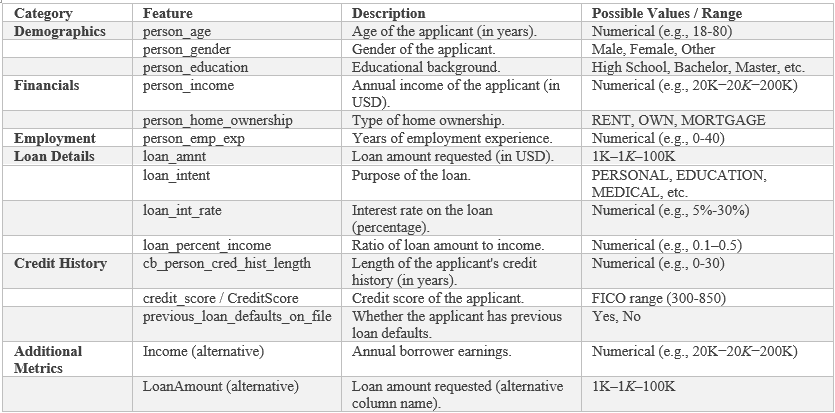

## 2.3 EDA

### 2.3.1. Variável Qualitativa Nominal e Ordinal

In [8]:
var_cat_nominal = []
var_cat_ordinal = []
df_cat = df[categorical_val]
for column in df_cat.columns:
    if len(df_cat[column].unique()) != 2:
        var_cat_ordinal.append(column)
    else:
        var_cat_nominal.append(column)

print(var_cat_nominal)
print(var_cat_ordinal)

print(df[var_cat_ordinal[0]].unique())

['person_gender', 'previous_loan_defaults_on_file', 'loan_status']
['person_education', 'person_home_ownership', 'loan_intent']
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']


### 2.3.2. Variável quantitativa discreta

In [9]:
var_quant_disc = []
var_quant_cont = []
df_num = df[continous_val]  # Make sure 'continuous_val' is defined and matches your DataFrame

for column in df_num.columns:
    if df_num[column].dtype == 'int64':  # Removed len() and the parentheses after dtype
        var_quant_disc.append(column)
    else:
        var_quant_cont.append(column)

# These variables weren't defined in your original code
# Make sure to define them before printing
print(var_quant_disc)  # This variable wasn't defined in your code
print(var_quant_cont)  # This variable wasn't defined in your code

[]
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


### 2.3.3 Análise Univariada

#### 2.3.1.1. Análise Univariada para verificar a distribuição dos dados do campo loan_status.

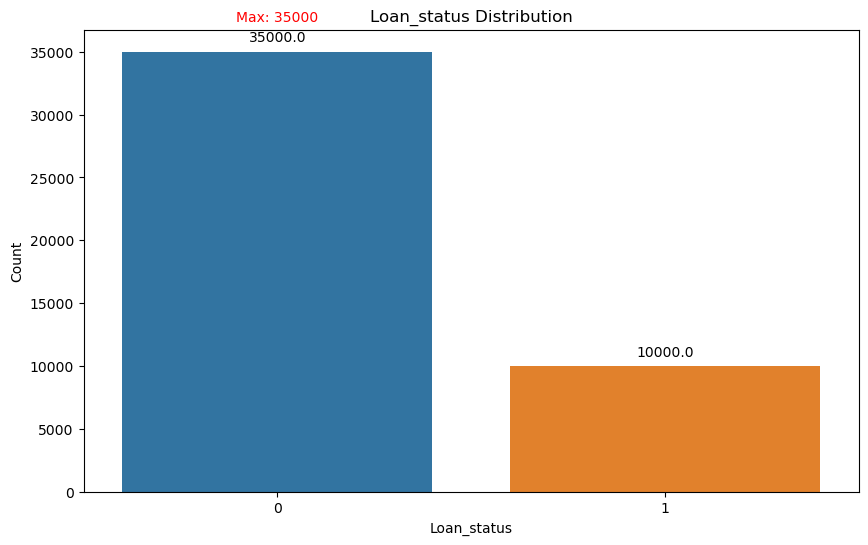

In [10]:
bar_plot_unique_var(df,'loan_status')

             Total_Amount  Average_Amount  Number_of_Loans  \
loan_status                                                  
0             322685192.0     9219.576914            35000   
1             108556898.0    10855.689800            10000   

             Percentage_of_Total  
loan_status                       
0                          74.83  
1                          25.17  


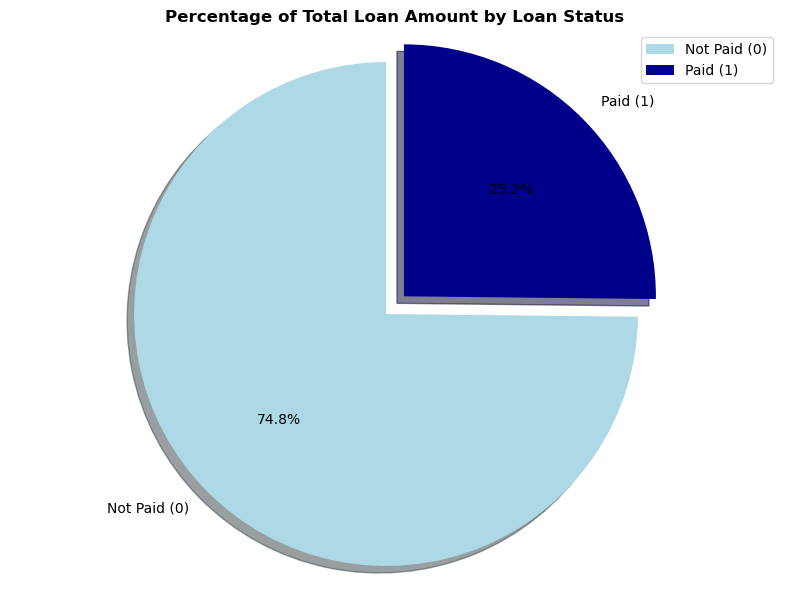

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by loan_status and calculate metrics
amount_by_status = df.groupby('loan_status')['loan_amnt'].agg(['sum', 'mean', 'count'])
amount_by_status.columns = ['Total_Amount', 'Average_Amount', 'Number_of_Loans']

# Calculate percentage of total amount
total_loan_amount = amount_by_status['Total_Amount'].sum()
amount_by_status['Percentage_of_Total'] = (amount_by_status['Total_Amount'] / total_loan_amount) * 100

# Round percentages
amount_by_status['Percentage_of_Total'] = amount_by_status['Percentage_of_Total'].round(2)

# Print the table
print(amount_by_status)

# --- PIE CHART ---
plt.figure(figsize=(8, 6))
colors = ['#ADD8E6','#00008B']
labels = ['Not Paid (0)', 'Paid (1)']
sizes = amount_by_status['Percentage_of_Total']

# Plot
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Show percentages on slices
    startangle=90,       # Rotate pie for better readability
    shadow=True,         # Add shadow for depth
    explode=(0.05, 0.05) # Slightly separate slices
)

# Add title and legend
plt.title('Percentage of Total Loan Amount by Loan Status', fontweight='bold')
plt.legend(labels, loc="best")

# Equal aspect ratio ensures pie is circular
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()

#### 2.3.1.1. Resposta: Não há valores nulos e todos os dados são distintos. Temos 45.000 pessoas no total, 35.000 não pagaram o empréstimo e 10.000 pagaram, então nosso problema é desbalanceado.

## 2.4. Hipóteses

### 2.4.1. Hipótese: "O consumidor não conseguiu pagar porque as parcelas comprometiam mais de 30% da sua renda, somadas a outras dívidas. O que o levou a não pagar o reempréstimo?"

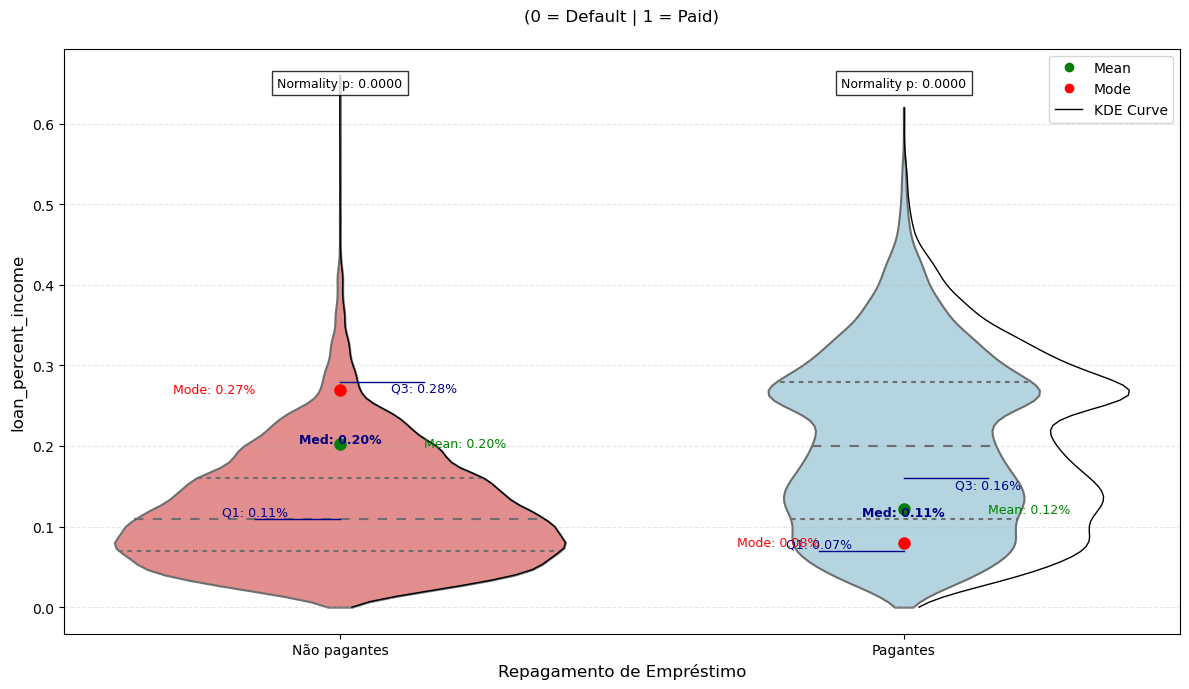

In [12]:
plot_violin_percent("loan_status", "loan_percent_income", df)

### 2.4.1. Resposta: O comprometimento da renda com dívidas para o grupo não pagante predominantemente está entre 11% e 28% da renda. E o grupo pagante possuium comprometimento entre 7% a 16% da renda. 

### 2.4.2. Hipótese - "O cliente possuidor de um empréstimo antes de contrair o novo empréstimo tem maior chance de nao pagar o reempréstimo."

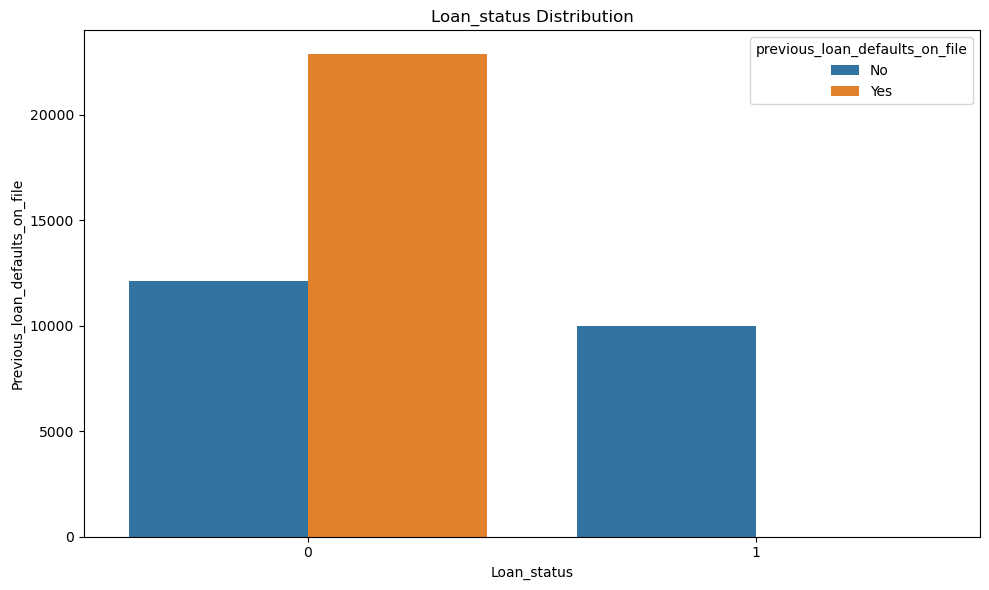

In [13]:
bar_plot_nominal(df, 'loan_status','previous_loan_defaults_on_file')

### 2.4.2. Resposta: Clientes que possuem empréstimos anteriores tem menor probabilidade de pagar o empréstimo atual. E podemos dizer que os clientes sem empréstimos anteriores tem maior probabilidade de pagar o empréstimo atual.

### 2.4.3. Hipótese: "O cliente possuidor de emprèstimos cujo os são mais elevados tem menor probabilidade de pagar?"

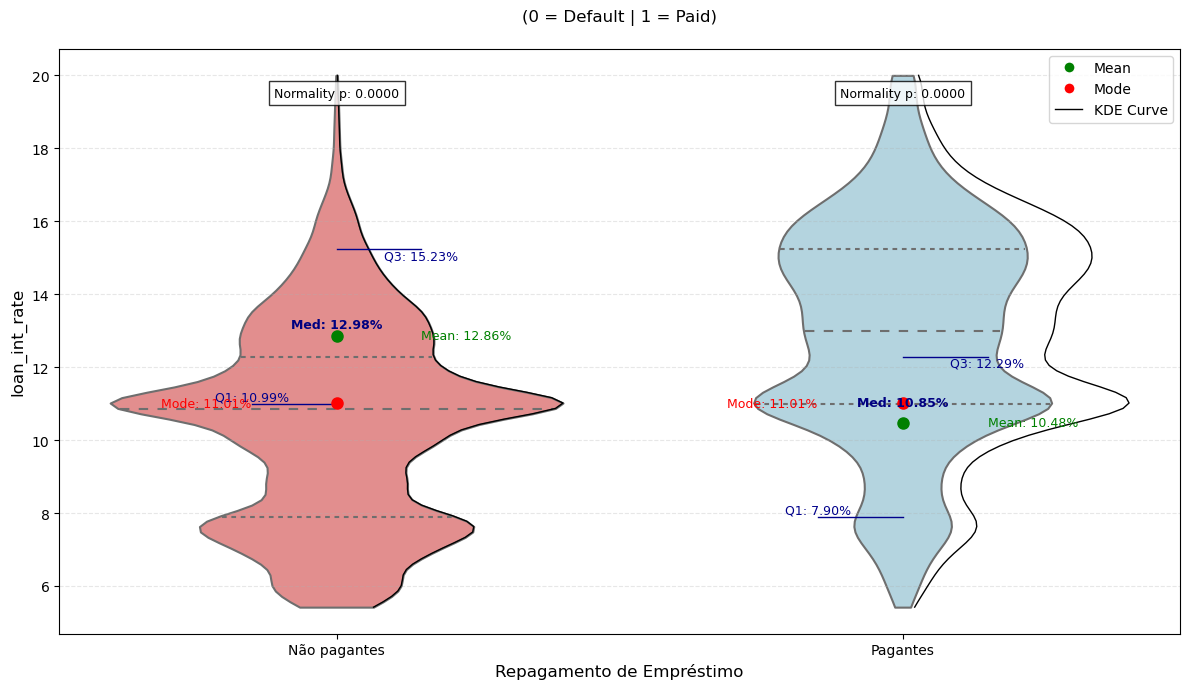

In [14]:
plot_violin_percent("loan_status", "loan_int_rate", df)

### 2.4.3. Hipótese: Este gráfico sugere que existe uma correlação entre taxas de juros mais altas e menor probabilidade de pagamento, possivelmente porque juros elevados tornam as parcelas mais pesadas no orçamento dos clientes, aumentando o risco de inadimplência.

### 2.4.4.  Hipótese: "Devido a uma emergência (problema de saúde) que afetou a renda do cliente, levando à inadimplência."

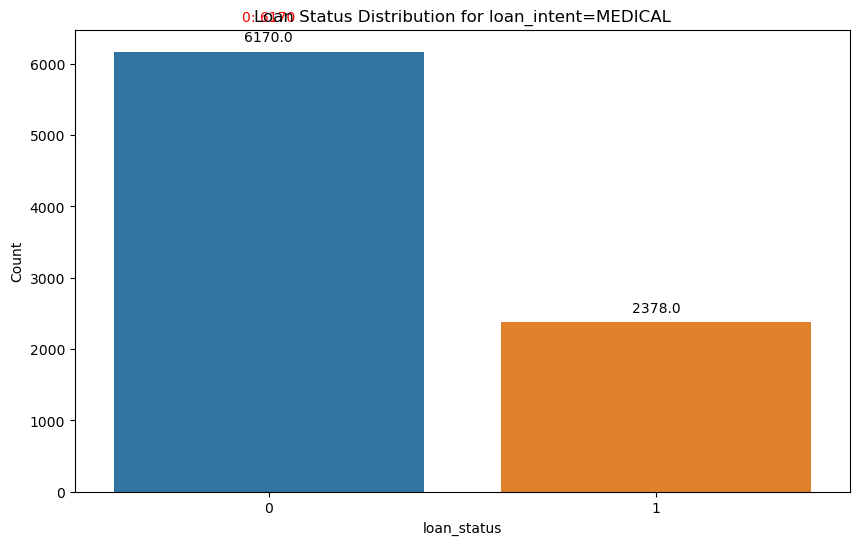

In [15]:
bar_plot_ordinal(df, 'MEDICAL','loan_intent','loan_status')

### 2.4.4. Reposta: Este gráfico demonstração de existe uma maior probabilidade de não repagamento dos empréstimos por parte do clientes quando o motivo é por condição médica.  

### 2.4.5. Hipótese:"Pessoas com maior grau de escolaridade tem maior probabilidade de pagar?"

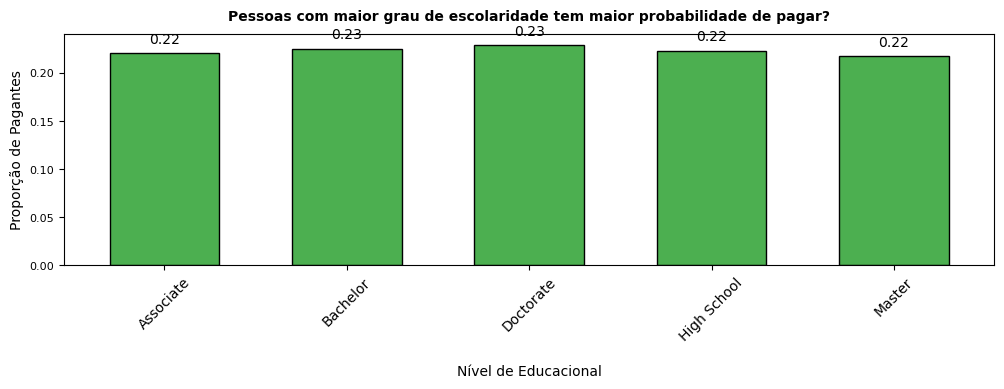

In [16]:
bar_plot_index(df,'person_education','loan_status')

### 2.4.5. Resposta: O nível educacional não altera significativamente a probabilidade de repagamento do empréstimo.

### 2.4.6. Hipótese:"Pessoas de possuem imóvel ou tem investimentos, tem maior probabilidade de pagar?"

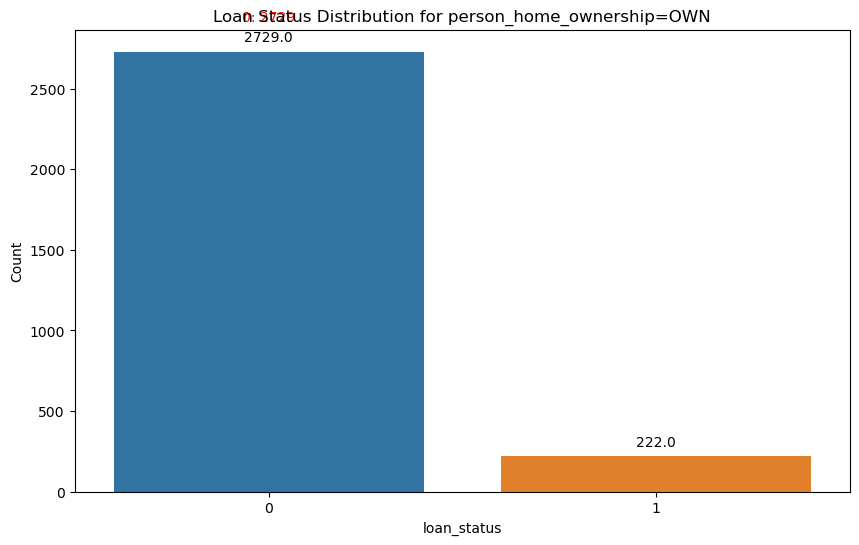

In [17]:
bar_plot_ordinal(df,'OWN','person_home_ownership', 'loan_status')

### 2.4.6. Resposta: "Pessoas de possuem imóvel tem maior probabilidade de não pagar o reempréstimo."

### 2.4.7. Hipótese: "Pessoas com menor faixa etária tem maior probabilidade de pagar?"

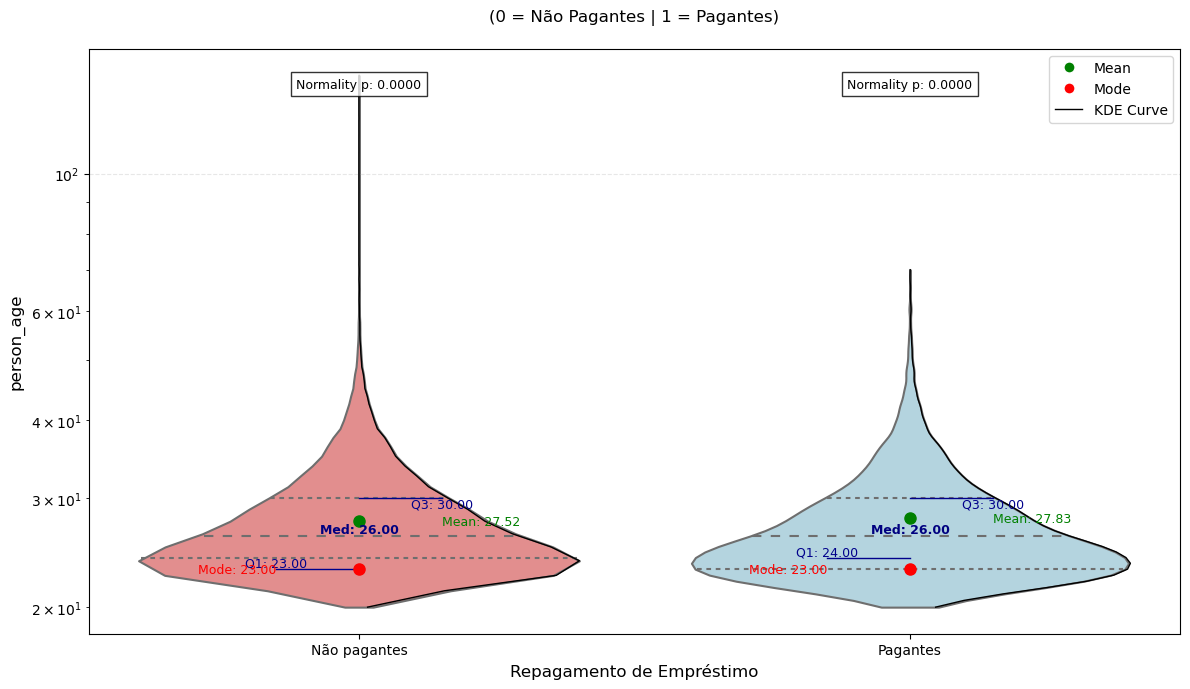

In [18]:
plot_violin_log('loan_status','person_age',df)

### 2.4.7. Resposta: Não podemos afirmar que pessoas com menor faixa etária tem maior probabilidade de pagar o empréstimo.

### 2.4.8. Hipótese: "Pessoas com maior renda mensal tem maior probabilidade de pagar?"

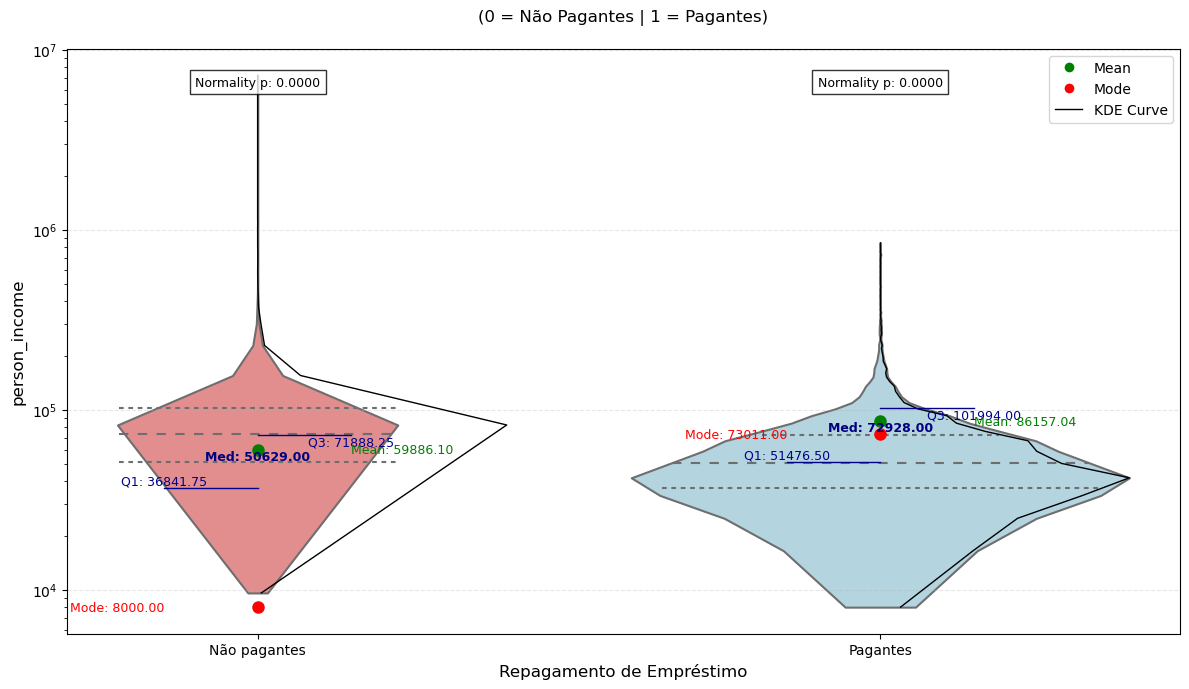

In [19]:
plot_violin_log('loan_status','person_income',df)

### 2.4.8. Resposta: Pessoas com maiores rendas tendem a pagar os reempréstimos.

### 2.4.9. Hipótese: "O cliente possuidor de emprèstimos cujo os são mais elevados tem menor probabilidade de pagar?"

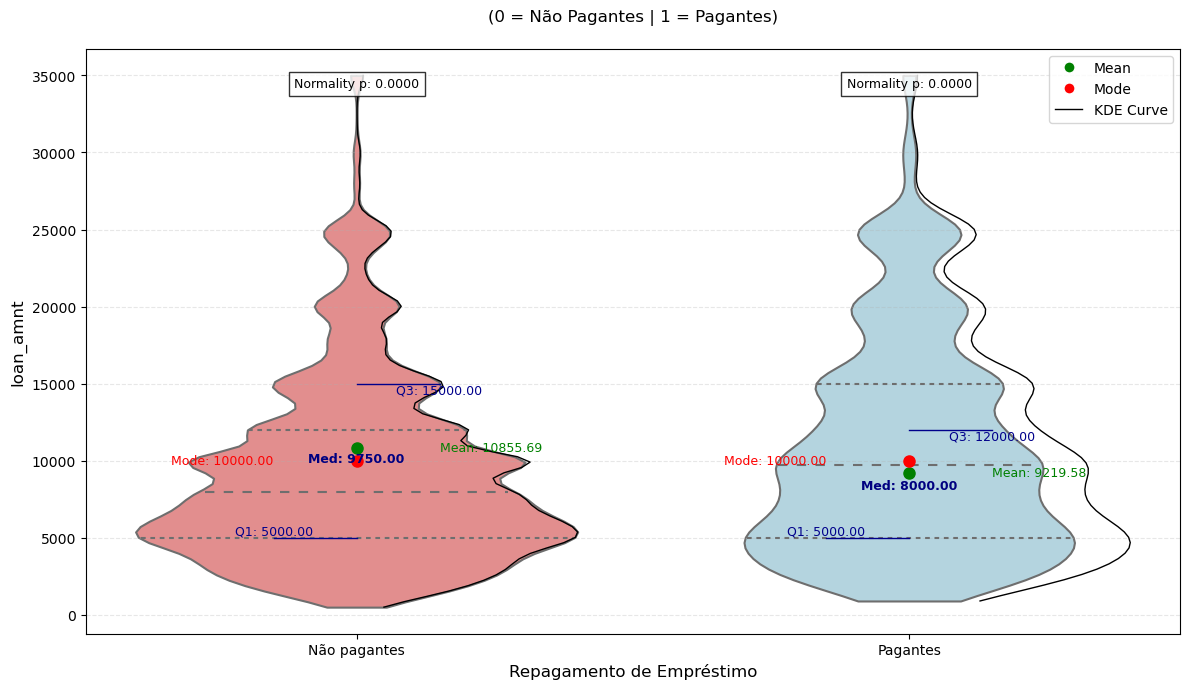

In [20]:
plot_violin('loan_status','loan_amnt',df)

### 2.4.9. Resposta: "O cliente possuidor de emprèstimos pagantes tem valores menores de emprèstimos."


### 2.4.10 Hipótese: "Pegou o empréstimo sem intenção de pagar (calote intencional), medir via histórico de empréstimos"

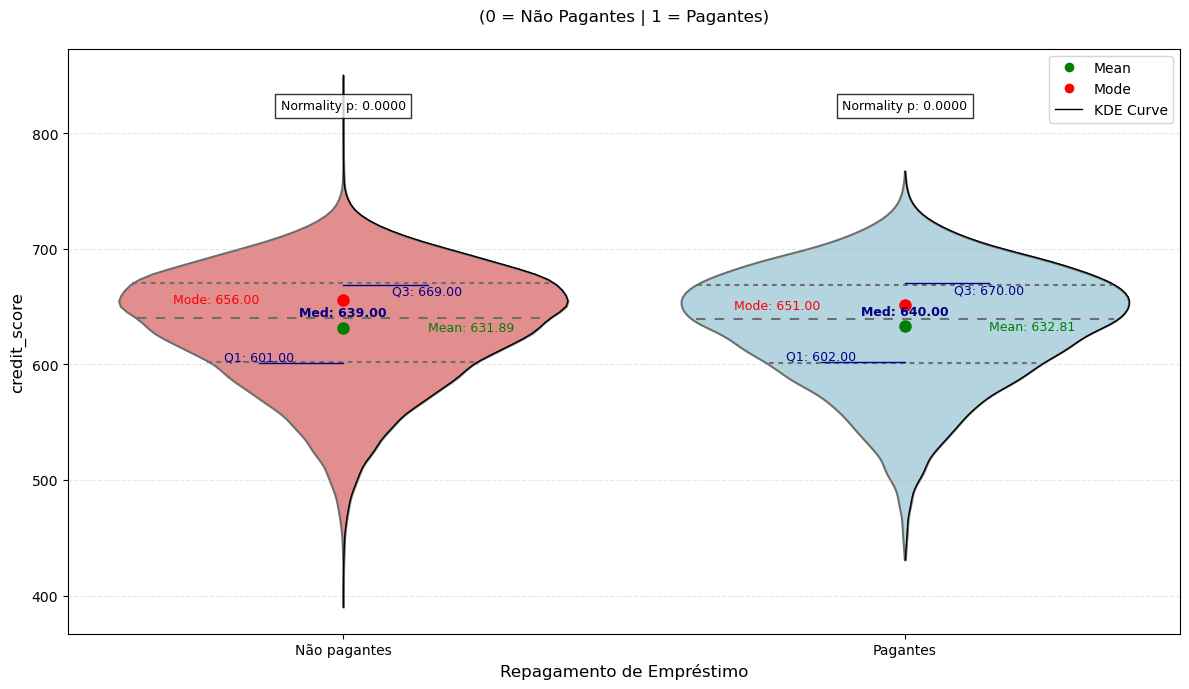

In [21]:
plot_violin('loan_status', 'credit_score', df)

### 2.4.10 Resposta: "O histórico de pagante e não pagante muito similar, não havendo diferença entre os dois em termos de o empréstimo sem intenção de pagar (calote intencional), medir via histórico de empréstimos"

# 3. Manipulação de Dados

## 3.1.  One Hot Encoding - Categorical Values

In [22]:
# One-hot encoding
df = pd.get_dummies(df,drop_first=True,dtype='int8')
df.head(5)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0,...,1,0,0,1,0,0,0,1,0,0
1,21,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0,...,0,0,1,0,1,0,0,0,0,1
2,25,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0,...,0,0,0,0,0,0,1,0,0,0
3,23,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0,...,0,0,0,1,0,0,1,0,0,0
4,24,66135.0,1,35000.0,14.27,0.53,4.0,586,1,1,...,1,0,0,1,0,0,1,0,0,0


## 3.2. Verificando Outliers em variáveis numéricas

In [23]:
import pandas as pd
import numpy as np

# Assuming you have a Pandas DataFrame named 'df'
# and 'continous_val' is a list of names of continuous columns
# and 'loan_status' is a column where 1 represents defaulted loans

# Filter the DataFrame for defaulted loans (loan_status == 1)
defaulted_df = df[df['loan_status'] == 1].copy() # Use .copy() to avoid SettingWithCopyWarning

# Calculate IQR bounds and analyze outliers only in defaulted loans
outlier_analysis = {}

for col in continous_val:
    # Calculate IQR bounds using ONLY the defaulted loans DataFrame
    Q1 = defaulted_df[col].quantile(0.25)
    Q3 = defaulted_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers in defaulted loans
    is_outlier = (defaulted_df[col] < lower_bound) | (defaulted_df[col] > upper_bound)
    defaulted_outliers = defaulted_df[is_outlier]

    # Store results
    outlier_analysis[col] = {
        'Lower Bound (Defaulted)': lower_bound,
        'Upper Bound (Defaulted)': upper_bound,
        'Total Defaulted Loans': len(defaulted_df),
        'Defaulted Outliers': len(defaulted_outliers),
        'Outlier Percentage (%)': (len(defaulted_outliers)/len(defaulted_df))*100 if len(defaulted_df) > 0 else 0
    }

# Convert to DataFrame and display
results_df = pd.DataFrame(outlier_analysis).T
results_df = results_df[['Lower Bound (Defaulted)', 'Upper Bound (Defaulted)', 'Total Defaulted Loans',
                            'Defaulted Outliers', 'Outlier Percentage (%)']]
print(results_df.sort_values('Outlier Percentage (%)', ascending=False))

# Corrected way to get high-risk outliers based on IQR of defaulted loans
outlier_condition = (defaulted_df['loan_int_rate'] < defaulted_df['loan_int_rate'].quantile(0.25) - 1.5 * (defaulted_df['loan_int_rate'].quantile(0.75) - defaulted_df['loan_int_rate'].quantile(0.25))) | \
                    (defaulted_df['loan_int_rate'] > defaulted_df['loan_int_rate'].quantile(0.75) + 1.5 * (defaulted_df['loan_int_rate'].quantile(0.75) - defaulted_df['loan_int_rate'].quantile(0.25)))

high_risk_outliers = defaulted_df[outlier_condition][['loan_int_rate', 'loan_status']]

print(f"\nHigh-risk outliers (defaulted loans with extreme interest rates):\n{high_risk_outliers.head()}")


                            Lower Bound (Defaulted)  Upper Bound (Defaulted)  \
person_income                            -15728.000               124458.000   
person_age                                   12.500                   40.500   
person_emp_exp                               -9.500                   18.500   
cb_person_cred_hist_length                   -4.500                   15.500   
credit_score                                499.000                  771.000   
loan_amnt                                -10000.000                30000.000   
loan_percent_income                          -0.145                    0.535   
loan_int_rate                                 4.630                   21.590   

                            Total Defaulted Loans  Defaulted Outliers  \
person_income                             10000.0               516.0   
person_age                                10000.0               395.0   
person_emp_exp                            10000.0           

## 3.3. Filtrando Outliers de Idade e Tempo de experiência

<Axes: xlabel='person_age', ylabel='person_emp_exp'>

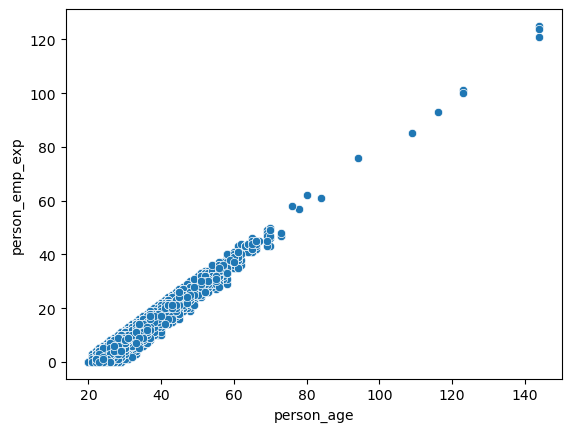

In [24]:
sns.scatterplot(x=df['person_age'], y=df['person_emp_exp'])

In [25]:
# Cleaning the person_age field
df = df[df['person_age']<= 100]
df = df[df['person_emp_exp']<= 60]

<Axes: xlabel='person_age', ylabel='person_emp_exp'>

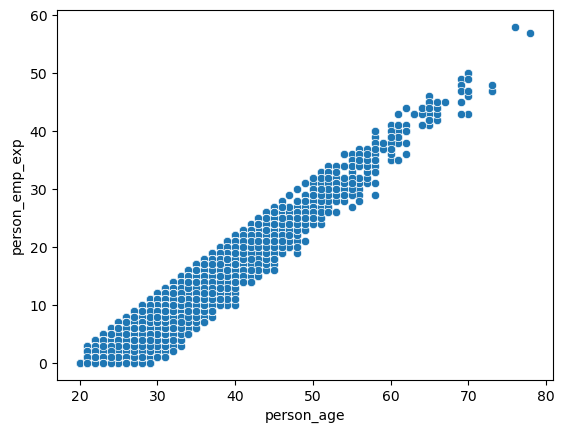

In [26]:
sns.scatterplot(x=df['person_age'], y=df['person_emp_exp'])

In [27]:
# Plotting the Correlation Matrix

# num_varibles = df.select_dtypes(include = ['float64', 'int'])
# plt.figure(figsize=(20, 16))
# cor_mat = num_varibles.corr()
# sns.heatmap(data=cor_mat, annot=True)

## 3.3. Resposta: Parece que os dados são robustos, consegui encontrar uma pessoa com 144 anos. Então, presumi que apenas pessoas com menos ou igual a 100 anos seriam consideradas neste conjunto de dados. Também removi pessoas com mais de 60 anos de experiência, pois parece um dado preenchido incorretamente.

## 3.4. Treinamento dos Modelos

### 3.4.1. Random_state em suas funções de divisão para reprodutibilidade e stratify habilitado. (70% treinamento, 15% validação, 15% teste)
Quando usar estratificar?
Problemas de classificação (não regressão).

Ao lidar com conjuntos de dados desbalanceados.

Para garantir uma avaliação justa do desempenho do modelo em todas as classes.

In [28]:
# Drop target column
X = df.drop(columns=['loan_status'], axis=1)

# Dataframe is only the target field
y = df['loan_status']
# print(y.describe())

# First split: 70% train, 30% temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=27,
    stratify=y  # Preserve class ratios
)

# Second split: 50% of temp -> 15% val, 15% test (of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=27,
    stratify=y_temp  # Stratify on the temporary split
)

# Verify sizes
print(f"Train: {len(X_train)} samples ({len(X_train)/len(X):.0%})")
print(f"Val:   {len(X_val)} samples ({len(X_val)/len(X):.0%})")
print(f"Test:  {len(X_test)} samples ({len(X_test)/len(X):.0%})")

# Verify class distribution
def check_distribution(y_data, name):
    classes, counts = np.unique(y_data, return_counts=True)
    print(f"\n{name} class distribution:")
    for cls, count in zip(classes, counts):
        print(f"Class {cls}: {count} samples ({count/len(y_data):.1%})")

check_distribution(y_train, "Training")
check_distribution(y_val, "Validation")
check_distribution(y_test, "Test")

Train: 31493 samples (70%)
Val:   6748 samples (15%)
Test:  6749 samples (15%)

Training class distribution:
Class 0: 24493 samples (77.8%)
Class 1: 7000 samples (22.2%)

Validation class distribution:
Class 0: 5248 samples (77.8%)
Class 1: 1500 samples (22.2%)

Test class distribution:
Class 0: 5249 samples (77.8%)
Class 1: 1500 samples (22.2%)


## 3.5. Normalização do dado (Regressão Logística e KNN somente)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for test data


## 3.6. Deploy dos Modelos

In [30]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [31]:
def evaluate_model(y_true, y_pred, y_proba=None):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
    }
    if y_proba is not None:  # Only if the model supports predict_proba
        metrics["ROC-AUC"] = roc_auc_score(y_true, y_proba[:, 1])  # Use probabilities of the positive class
        metrics["Log Loss"] = log_loss(y_true, y_proba)
    return metrics

In [32]:
# Initialize results dictionary

results_dict = {'Logistic Regression': [],
                'KNN': [],
                'Decision Tree': [],
                'Random Forest': [],
                'XGBoost': [],
                
                }

### 3.6.2. Treinamento dos Modelos

In [ ]:
# Regressão 
def train_log_reg(X_train_scaled, X_test_scaled, y_train, y_test, results_dict):
    """Train a Logistic Regression model and evaluate its performance."""
    log_reg = LogisticRegression(solver='liblinear')
    log_reg.fit(X_train_scaled, y_train)
    y_pred = log_reg.predict(X_test_scaled)
    y_proba = log_reg.predict_proba(X_test_scaled)
    results = evaluate_model(y_test, y_pred, y_proba)
    results_dict['Logistic Regression'].append(results)
    return results

# K-Nearest Neighbors
def train_knn(X_train_scaled, X_test_scaled, y_train, y_test, results_dict):
    """
    Train a K-Nearest Neighbors classifier and evaluate its performance.
    """
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    y_proba = knn.predict_proba(X_test_scaled)
    results = evaluate_model(y_test, y_pred, y_proba)
    results_dict['KNN'].append(results)
    return results

# Decision Tree
def train_dec_tree(X_train, X_test, y_train, y_test, results_dict):
    """Train a Decision Tree Classifier model and evaluate its performance."""
    dec_tree = DecisionTreeClassifier(random_state=42)
    dec_tree.fit(X_train, y_train)

    y_pred = dec_tree.predict(X_test)
    y_proba = dec_tree.predict_proba(X_test)
    results = evaluate_model(y_test, y_pred, y_proba)
    results_dict['Decision Tree'].append(results)
    return results

# Random Forest
def train_rand_for(X_train, X_test, y_train, y_test, results_dict):
    """Train a Random Forest Classifier model and evaluate its performance."""
    rand_for = RandomForestClassifier(n_estimators=1000, random_state=42)
    rand_for.fit(X_train, y_train)
    y_pred = rand_for.predict(X_test)
    y_proba = rand_for.predict_proba(X_test)
    results = evaluate_model(y_test, y_pred, y_proba)
    results_dict['Random Forest'].append(results)
    return results


def train_xgb(X_train, X_test, y_train, y_test, results_dict):
    """Train an XGBoost Classifier model and evaluate its performance."""
    # Initialize and train XGBoost model with fixed parameters
    xgb = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
    xgb.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb.predict(X_test)
    y_proba = xgb.predict_proba(X_test)

    results = evaluate_model(y_test, y_pred, y_proba)
    results_dict['XGBoost'].append(results)
    return results



# Train and evaluate the model
results_log_reg = train_log_reg(X_train_scaled, X_test_scaled, y_train, y_test, results_dict)

results_knn = train_knn(X_train_scaled, X_test_scaled, y_train, y_test, results_dict)

results_dec_tree = train_dec_tree(X_train, X_test, y_train, y_test, results_dict)
# Train and evaluate the model
results_rand_for = train_rand_for(X_train, X_test, y_train, y_test, results_dict)

# Train and evaluate the model
results_xgb = train_xgb(X_train, X_test, y_train, y_test, results_dict)

print(results_dict)

        

{'Logistic Regression': [{'Accuracy': 0.8943547192176619, 'Precision': 0.7667796610169492, 'Recall': 0.754, 'F1-Score': 0.7603361344537815, 'ROC-AUC': 0.9521646027814823, 'Log Loss': 0.22572376741818606}], 'KNN': [{'Accuracy': 0.8865017039561417, 'Precision': 0.7784522003034902, 'Recall': 0.684, 'F1-Score': 0.7281760113555713, 'ROC-AUC': 0.9177858639740903, 'Log Loss': 0.7978672054394523}], 'Decision Tree': [{'Accuracy': 0.9007260334864424, 'Precision': 0.7698309492847855, 'Recall': 0.7893333333333333, 'F1-Score': 0.7794601711652404, 'ROC-AUC': 0.8609459579602464, 'Log Loss': 3.5781964395774923}], 'Random Forest': [{'Accuracy': 0.9272484812564824, 'Precision': 0.8883756735950731, 'Recall': 0.7693333333333333, 'F1-Score': 0.8245802072168631, 'ROC-AUC': 0.9721577443322539, 'Log Loss': 0.17657968603643437}], 'XGBoost': [{'Accuracy': 0.9198399762927841, 'Precision': 0.8602554470323065, 'Recall': 0.7633333333333333, 'F1-Score': 0.8089014482515011, 'ROC-AUC': 0.9687826252619547, 'Log Loss': 

# 4. Resultados

## 4.1. Comparação de Modelos

In [34]:
# Extract the first (and in this case, only) dictionary of metrics for each algorithm
metrics_list = []
for model, metrics in results_dict.items():
    first_metric_set = metrics[0]
    first_metric_set['Algorithm'] = model
    metrics_list.append(first_metric_set)

# Create a Pandas DataFrame from the list of metrics
df = pd.DataFrame(metrics_list)

# Set the 'Algorithm' column as the index for better readability
df.set_index('Algorithm', inplace=True)

# Print the DataFrame as a formatted table
print(df.to_markdown())

| Algorithm           |   Accuracy |   Precision |   Recall |   F1-Score |   ROC-AUC |   Log Loss |
|:--------------------|-----------:|------------:|---------:|-----------:|----------:|-----------:|
| Logistic Regression |   0.894355 |    0.76678  | 0.754    |   0.760336 |  0.952165 |   0.225724 |
| KNN                 |   0.886502 |    0.778452 | 0.684    |   0.728176 |  0.917786 |   0.797867 |
| Decision Tree       |   0.900726 |    0.769831 | 0.789333 |   0.77946  |  0.860946 |   3.5782   |
| Random Forest       |   0.927248 |    0.888376 | 0.769333 |   0.82458  |  0.972158 |   0.17658  |
| XGBoost             |   0.91984  |    0.860255 | 0.763333 |   0.808901 |  0.968783 |   0.179996 |


## 4.2. Seleção de Features com Algoritmo Boruta

In [35]:
# Implement a Random Forest Model on the training data
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)

boruta_selector.fit(X_train.values, y_train.values.ravel()) 

sel_X_train = boruta_selector.transform(X_train.values)
sel_X_test = boruta_selector.transform(X_test.values)

# Get the selected features
selected_feature_mask = boruta_selector.support_
selected_features = X_train.columns[selected_feature_mask]
selected_features

# print("Selected features:", selected_features)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	15


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	15


Index(['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'credit_score', 'person_home_ownership_RENT',
       'previous_loan_defaults_on_file_Yes'],
      dtype='object')

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from boruta import BorutaPy

# Implement Random Forest Model with Boruta feature selection
rfc = RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=42)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(X_train.values, y_train.values.ravel())

# Transform datasets to only include selected features
sel_X_train = boruta_selector.transform(X_train.values)
sel_X_test = boruta_selector.transform(X_test.values)

# Get selected features
selected_feature_mask = boruta_selector.support_
selected_features = X_train.columns[selected_feature_mask]

# Train final model on selected features
rfc_final = RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=42)
rfc_final.fit(sel_X_train, y_train.values.ravel())

# Make predictions
y_pred = rfc_final.predict(sel_X_test)
y_pred_proba = rfc_final.predict_proba(sel_X_test)[:, 1]  # Probabilities for positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	15


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	15


In [37]:
print("\nSelected Features:", selected_features.tolist())
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Log Loss: {logloss:.4f}")


Selected Features: ['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'credit_score', 'person_home_ownership_RENT', 'previous_loan_defaults_on_file_Yes']

Model Performance Metrics:
Accuracy: 0.9187
Precision: 0.8583
Recall: 0.7593
F1-Score: 0.8058
ROC-AUC: 0.9672
Log Loss: 0.1831


## 4.2 Evalution Metrics

### 4.2.1 Comments: High Accuracy (92.7%): The model is correct 93% of the time, making it reliable for general use. Business Impact: Reduces operational costs by minimizing manual verification needs.

## High ROC-AUC (97,2%): Near-perfect ability to distinguish between classes (97.2%). Business Impact: Trustworthy for ranking/scoring applications.

## High Precision (88.8%): 89% of predicted positives are correct (low false alarms). Business Impact: Ideal for: Spam filtering (few legitimate emails marked as spam). Fraud detection (minimizes unnecessary transaction blocks).



In [38]:
results = {'XGBoost': []}       

## 4.3. Otimização XGBoost

In [39]:
def train_xgb_optimized(X_train, X_test, y_train, y_test, results_dict):
    """Train an XGBoost Classifier model and evaluate its performance."""
    
    param_grid = {
    'learning_rate': [0.01],
    'scale_pos_weight': [1, 2, 3],
}
    
    xgb = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=10,andom_state=42)
    grid_search = RandomizedSearchCV(xgb, param_grid, n_iter=50, cv=5)
    grid_search.fit(X_train, y_train)
    print("Best parameters:", grid_search.best_params_)
    
    # xgb = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=3, random_state=42)
    # grid_search = GridSearchCV(xgb, param_grid, cv=10, scoring="f1_macro")
    # grid_search.fit(X_train, y_train)
    # xgb = grid_search.best_estimator_
    # print("Chosen parameters:", grid_search.best_params_)

    y_pred = grid_search.predict(X_test)
    y_proba = grid_search.predict_proba(X_test)
    results = evaluate_model(y_test, y_pred, y_proba)
    results_dict['XGBoost'].append(results)
    return results

In [40]:
# Train and evaluate the model
results_xgb = train_xgb(X_train, X_test, y_train, y_test, results)

print("\nSelected Features:", results)



Selected Features: {'XGBoost': [{'Accuracy': 0.9198399762927841, 'Precision': 0.8602554470323065, 'Recall': 0.7633333333333333, 'F1-Score': 0.8089014482515011, 'ROC-AUC': 0.9687826252619547, 'Log Loss': 0.17999630076363002}]}


## 4.4. Fatores que impactam mais no resultado

In [41]:
# Get feature importances
importances = rand_for.feature_importances_
feature_names = X_train.columns  # Replace with your feature names

# Sort features
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Random Forest Feature Importance (Gini)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

NameError: name 'rand_for' is not defined

###4.3.1 The importance analysis using Randon Forest, which shows what factors impact most on the results.
## Three main factors are: Whether the applicant has previous loan defaults (Yes or No), ratio of loan amount to income and interest rate on the loan (percentage).